In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isna().sum()

177

In [4]:
import seaborn as sns

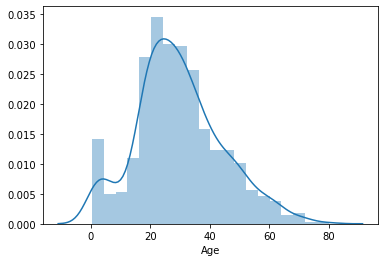

In [5]:
sns.distplot(df['Age'].dropna());

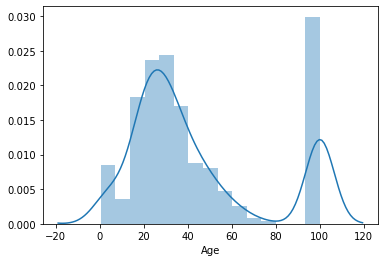

In [6]:
sns.distplot(df['Age'].fillna(100));

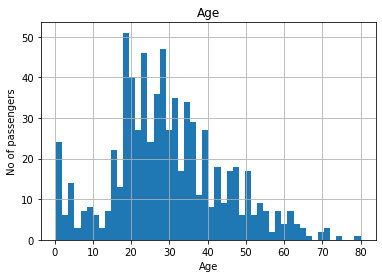

In [7]:
figure = df.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers');

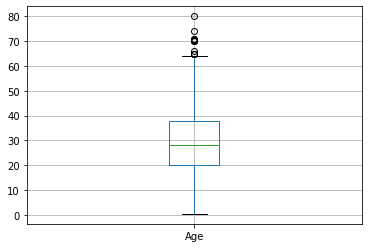

In [8]:
figure= df.boxplot(column = 'Age');

In [9]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
upper_boundary = df['Age'].mean() +  3* df['Age'].std()
lower_boundary = df['Age'].mean() -  3* df['Age'].std()
print(lower_boundary),print(upper_boundary),print(df.Age.mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [11]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [12]:
IQR

23.0896

Text(0, 0.5, 'No. of passengers')

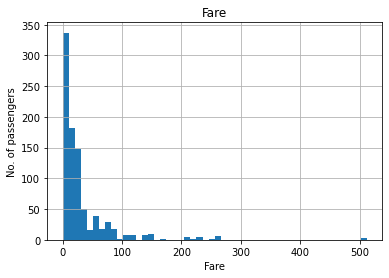

In [13]:
figure = df.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passengers')

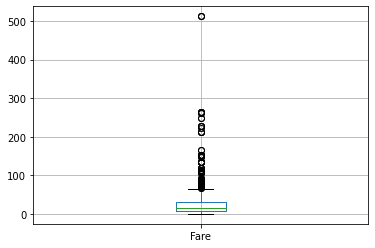

In [14]:
df.boxplot(column = 'Fare')

In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
lower_bridge = df.Fare.quantile(0.25)- (IQR * 1.5)
upper_bridge = df.Fare.quantile(0.75) + (IQR * 1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [17]:
lower_bridge = df.Fare.quantile(0.25)- (IQR * 3)
upper_bridge = df.Fare.quantile(0.75)+ (IQR * 3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [18]:
data= df.copy()

In [19]:
data.loc[data['Age'] >= 73 ,'Age'] = 73
data.loc[data['Fare']>= 100 , 'Fare'] = 100

Text(0, 0.5, 'No.of passengers')

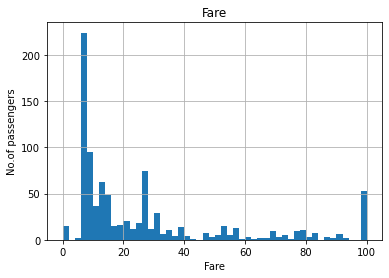

In [20]:
figure = data.Fare.hist(bins =50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No.of passengers')

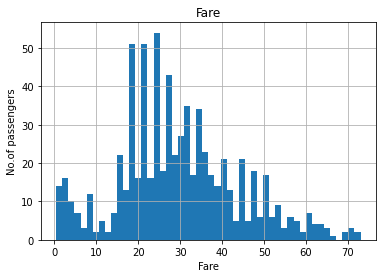

In [21]:
figure = data.Age.hist(bins =50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No.of passengers');

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
data.Age.isna().sum()

177

In [25]:
data.loc[data['Age'] >= 73,'Age'] = 73

In [26]:
data.Age.isna().sum()

177

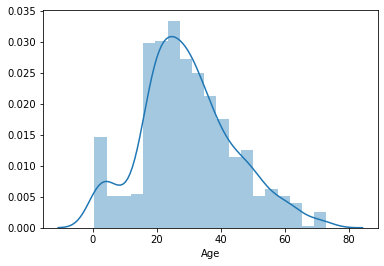

In [27]:
sns.distplot(data['Age'])

In [28]:
data['Age'].fillna(73)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    73.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
data.Age.isna().sum()

177

In [30]:
data['Age'] = data['Age'].fillna(73)

In [31]:
data['Age'].isna().sum()

0

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
for labels, values in data.items():
    if not pd.api.types.is_numeric_dtype(values):
        print(labels)

Name
Sex
Ticket
Cabin
Embarked


In [35]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data.Embarked.dtype

dtype('O')

In [37]:
data['Embarked'].nunique()

3

In [38]:
data['Cabin'].nunique()

147

In [39]:
data.drop('Cabin', axis = 1, inplace = True)

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


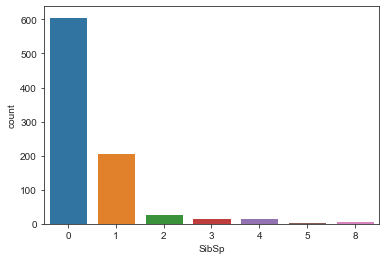

In [41]:
sns.set_style('ticks')
sns.countplot(x= 'SibSp',data = data);

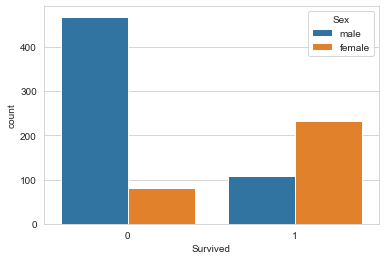

In [42]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex',data = data);

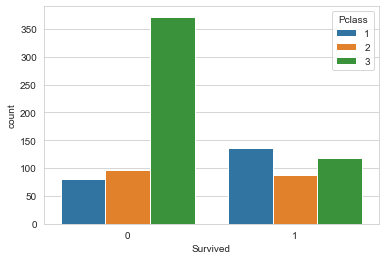

In [43]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue = 'Pclass', data = data);

In [44]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

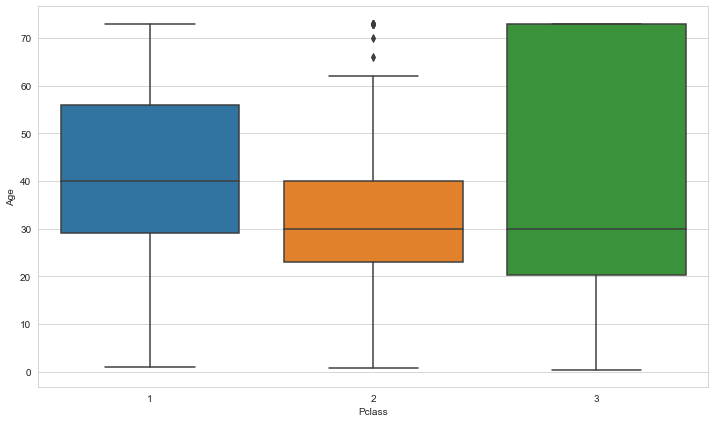

In [45]:
plt.figure(figsize =(12, 7) )
sns.boxplot(x='Pclass', y= 'Age', data = data);

In [46]:
data.dropna(inplace = True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
sex = pd.get_dummies(data['Sex'],drop_first = True)
Embarked = pd.get_dummies(data['Embarked'],drop_first = True)

In [50]:
train = data.drop(['PassengerId','Name','Ticket','Sex','Embarked'],axis = 1)

In [51]:
train = pd.concat([train,sex,Embarked],axis = 1)

In [52]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis = 1)
y = train['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [54]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [55]:
log.fit(X_train, y_train)

C:\Users\nawaz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_preds = log.predict(X_test)

In [57]:
y_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
mat = confusion_matrix(y_test,y_preds)

In [60]:
mat

array([[97, 16],
       [20, 45]], dtype=int64)

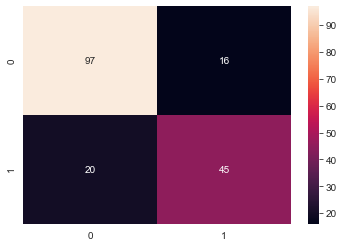

In [61]:
sns.heatmap(mat,annot = True);

In [62]:
##Hyperparameter tuning
params = {'C': np.logspace(-4,4,30),
         'solver' : ['liblinear']}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid = GridSearchCV(LogisticRegression(),
                   params,
                   cv = 5,
                   verbose = True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [65]:
y_pred = grid.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[96, 17],
       [20, 45]], dtype=int64)

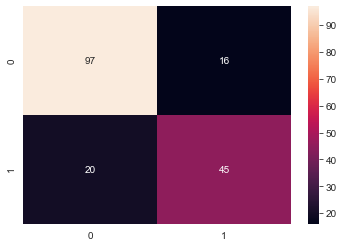

In [67]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot= True);

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier()

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
rfc_y_preds = rfc.predict(X_test)
rfc_y_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [72]:
conf = confusion_matrix(y_test,y_preds)
conf

array([[97, 16],
       [20, 45]], dtype=int64)

In [73]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [74]:
params = {'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]}

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           params,
                           verbose = True,
                           cv = 5 )
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [3, 6],
                                        'max_features': [0.5, 0.7],
                                        'n_estimators': [200, 500]},
                   verbose=True)

In [77]:
rs_rf.best_params_

{'n_estimators': 500, 'max_features': 0.7, 'max_depth': 6, 'bootstrap': True}

In [78]:
rs_ypreds = rs_rf.predict(X_test)

In [79]:
conf_mat = confusion_matrix(y_test,rs_ypreds)

In [80]:
conf_mat

array([[98, 15],
       [22, 43]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report

In [82]:
cls_re = classification_report(y_test, rs_ypreds)

In [83]:
print(cls_re)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       113
           1       0.74      0.66      0.70        65

    accuracy                           0.79       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.79      0.79      0.79       178



In [84]:
import joblib
joblib.dump(rs_rf, 'RandomForestclassifier.pkl')

['RandomForestclassifier.pkl']